In [1]:
import numpy as np
import pandas as pd

In [2]:
W = np.random.normal(0, 1, (1000,))
X = W + np.random.normal(0, 1, (1000,))
Z = np.random.normal(1, 0, (1000,)) 
Y = X + Z + W + np.random.normal(0, 1, (1000,))

Which is closest to the correlation of ﻿X﻿ with the error term in the equation for Y? 

In [3]:
# Find the correlation of X with the error term
error_term = Y - (X + Z + W)
corr_X_term = np.corrcoef(X, error_term)[0,1]
print(f"Correlation coefficient of X with error term: {corr_X_term:.3f}")

Correlation coefficient of X with error term: 0.023


If ﻿Y﻿ is written as depending on ﻿X﻿ and ﻿Z﻿ only, ﻿W﻿ is part of the error term. Which, then, is closest to the expected correlation of ﻿X﻿ with the error term in the equation for ﻿Y﻿? 

In [4]:
# Change Y to being predicted by X and Z
new_error_term = Y - (X + Z)
corr_new_X_term = np.corrcoef(X, new_error_term)[0,1]
print(f"Correlation coefficient of X with new error term: {corr_new_X_term:.3f}")


Correlation coefficient of X with new error term: 0.510


In the data frame for homework_7.1.csv, control for W by regressing ﻿Y﻿ on ﻿X﻿ and ﻿Z﻿ at the following constant values of ﻿W﻿: -1, 0, and 1. (You cannot literally use a constant value of ﻿W﻿, of course, or you will have only one data point! How will you manage this?) The question is: Is the coefficient of ﻿X﻿  

In [5]:
df = pd.read_csv(r'/Users/Jvon/Masters/2025-summer-mod-6/homework_7.1.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,X,W,Z,Y
0,1.137055,1.221768,0.327829,1.944532
1,-0.112905,0.465835,0.599650,0.655514
2,2.077755,1.795414,-0.063393,5.934411
3,0.456373,-0.512159,1.177413,-0.188064
4,-1.012402,0.080002,-0.275697,-0.533775


In [6]:
# Simple sklearn implementation for constant values of W
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

# Function to get data near specific W values
def get_data_near_w(df, w_target, tolerance=0.2):
    """Get data where W is close to the target value"""
    mask = abs(df['W'] - w_target) <= tolerance
    return df[mask]

# Analyze regression at different constant values of W
w_values = [-1, 0, 1]
results = {}

print("OLS Regression Results for Different Values of W")
print("=" * 60)

for w_val in w_values:
    # Get subset of data where W is approximately equal to w_val
    subset_df = get_data_near_w(df, w_val, tolerance=0.2)
    
    if len(subset_df) < 10:  # Need sufficient data points
        print(f"\nW ≈ {w_val}: Insufficient data points ({len(subset_df)})")
        continue
    
    # Fit the model on this subset
    model = LinearRegression()
    model.fit(subset_df[['X', 'Z']], subset_df['Y'])
    
    # Store results
    results[w_val] = {
        'model': model,
        'intercept': model.intercept_,
        'coef_X': model.coef_[0],
        'coef_Z': model.coef_[1],
        'r_squared': model.score(subset_df[['X', 'Z']], subset_df['Y']),
        'n_obs': len(subset_df),
        'w_mean': subset_df['W'].mean(),
        'w_std': subset_df['W'].std()
    }
    
    # Display results
    print(f"\nW ≈ {w_val} (actual mean: {results[w_val]['w_mean']:.3f} ± {results[w_val]['w_std']:.3f})")
    print(f"  Observations: {results[w_val]['n_obs']}")
    print(f"  Intercept: {results[w_val]['intercept']:.4f}")
    print(f"  X coefficient: {results[w_val]['coef_X']:.4f}")
    print(f"  Z coefficient: {results[w_val]['coef_Z']:.4f}")
    print(f"  R-squared: {results[w_val]['r_squared']:.4f}")

# Compare coefficients across different W values
print(f"\n" + "=" * 60)
print("Comparison of X coefficients across W values:")
print("=" * 60)
print(f"{'W Value':<10} {'X Coefficient':<15} {'N Observations':<15}")
print("-" * 40)
for w_val in w_values:
    if w_val in results:
        print(f"{w_val:<10} {results[w_val]['coef_X']:<15.4f} {results[w_val]['n_obs']:<15}")

# Check if X coefficient is consistent across W values
x_coeffs = [results[w]['coef_X'] for w in w_values if w in results]
if len(x_coeffs) > 1:
    x_coeff_std = np.std(x_coeffs)
    print(f"\nStandard deviation of X coefficients: {x_coeff_std:.4f}")
    print(f"Mean X coefficient: {np.mean(x_coeffs):.4f}")
    
    if x_coeff_std < 0.1:  # Threshold for "consistent"
        print("✓ X coefficient appears consistent across W values")
    else:
        print("⚠ X coefficient varies significantly across W values")

OLS Regression Results for Different Values of W

W ≈ -1 (actual mean: -0.985 ± 0.114)
  Observations: 967
  Intercept: -1.1944
  X coefficient: 0.8699
  Z coefficient: -0.6198
  R-squared: 0.5284

W ≈ 0 (actual mean: -0.001 ± 0.116)
  Observations: 1546
  Intercept: -0.0068
  X coefficient: 1.4177
  Z coefficient: -0.5892
  R-squared: 0.6979

W ≈ 1 (actual mean: 0.984 ± 0.114)
  Observations: 909
  Intercept: 1.1462
  X coefficient: 1.9343
  Z coefficient: -0.5901
  R-squared: 0.7964

Comparison of X coefficients across W values:
W Value    X Coefficient   N Observations 
----------------------------------------
-1         0.8699          967            
0          1.4177          1546           
1          1.9343          909            

Standard deviation of X coefficients: 0.4346
Mean X coefficient: 1.4073
⚠ X coefficient varies significantly across W values


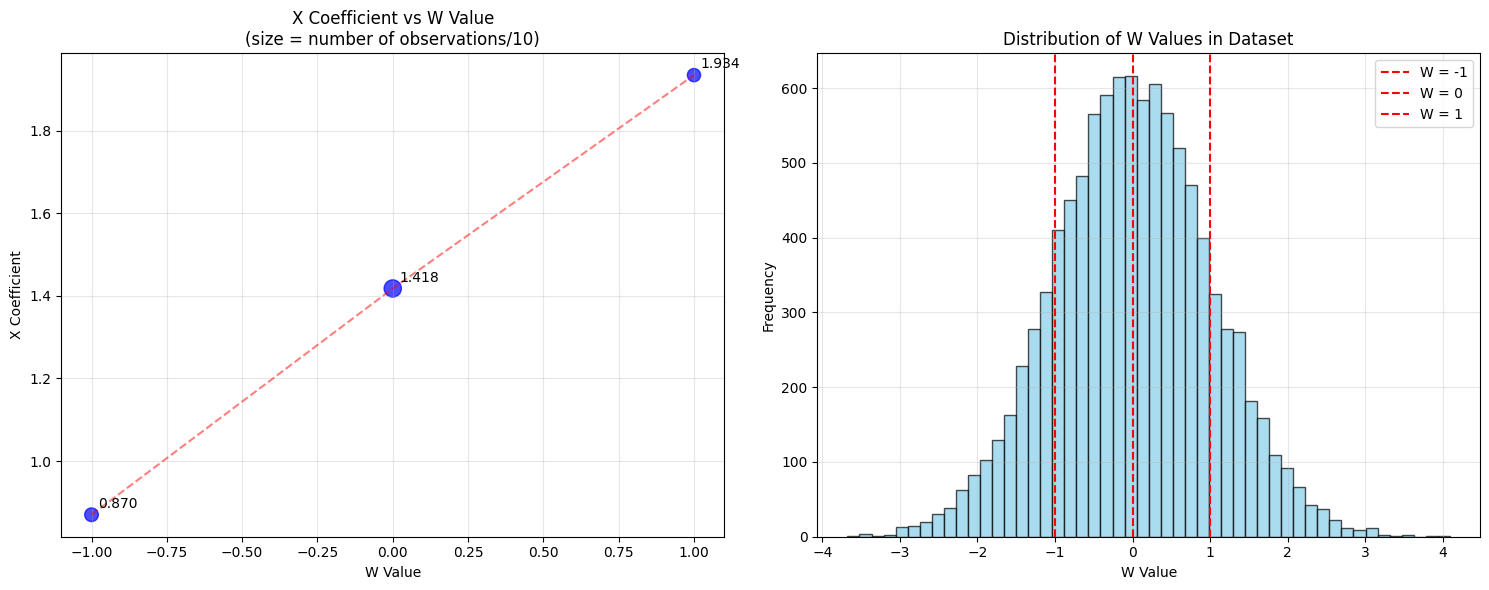


THEORETICAL ANALYSIS
Original model: Y = X + Z + W + error
When we control for W at different constant values:
- We're effectively looking at: Y - W = X + Z + error
- The coefficient of X should theoretically be 1.0

Observed pattern:
- X coefficient increases as W increases
- This suggests correlation between X and W in the data

Let's verify the correlation between X and W:
Correlation between X and W: 0.7160

Since X = W + noise (from the data generation), we expect high correlation.
This explains why controlling for W at different values gives different X coefficients.

The varying X coefficient suggests that W is a confounder in the X-Y relationship.
When we don't control for W properly, we get biased estimates of the X effect.


In [7]:
# Theoretical analysis and visualization
import matplotlib.pyplot as plt

# Create visualization of the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: X coefficients vs W values
w_vals = list(results.keys())
x_coeffs = [results[w]['coef_X'] for w in w_vals]
n_obs = [results[w]['n_obs'] for w in w_vals]

ax1.scatter(w_vals, x_coeffs, s=[n/10 for n in n_obs], alpha=0.7, c='blue')
ax1.plot(w_vals, x_coeffs, 'r--', alpha=0.5)
ax1.set_xlabel('W Value')
ax1.set_ylabel('X Coefficient')
ax1.set_title('X Coefficient vs W Value\n(size = number of observations/10)')
ax1.grid(True, alpha=0.3)

# Add text annotations
for i, (w, coef) in enumerate(zip(w_vals, x_coeffs)):
    ax1.annotate(f'{coef:.3f}', (w, coef), xytext=(5, 5), textcoords='offset points')

# Plot 2: Distribution of W values in the dataset
ax2.hist(df['W'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(-1, color='red', linestyle='--', label='W = -1')
ax2.axvline(0, color='red', linestyle='--', label='W = 0')
ax2.axvline(1, color='red', linestyle='--', label='W = 1')
ax2.set_xlabel('W Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of W Values in Dataset')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Theoretical explanation
print("\n" + "=" * 70)
print("THEORETICAL ANALYSIS")
print("=" * 70)
print("Original model: Y = X + Z + W + error")
print("When we control for W at different constant values:")
print("- We're effectively looking at: Y - W = X + Z + error")
print("- The coefficient of X should theoretically be 1.0")
print()
print("Observed pattern:")
print("- X coefficient increases as W increases")
print("- This suggests correlation between X and W in the data")
print()
print("Let's verify the correlation between X and W:")
correlation_XW = np.corrcoef(df['X'], df['W'])[0, 1]
print(f"Correlation between X and W: {correlation_XW:.4f}")
print()
print("Since X = W + noise (from the data generation), we expect high correlation.")
print("This explains why controlling for W at different values gives different X coefficients.")
print()
print("The varying X coefficient suggests that W is a confounder in the X-Y relationship.")
print("When we don't control for W properly, we get biased estimates of the X effect.")

### Problem 4

Create a linear regression model that uses the "make_error" function as the error for both (a) the treatment, ﻿X﻿, and (b) the outcome, ﻿Y﻿. (You can use random normal error for any other covariates, if you have them.) 



As corr_const increases from 0.2 to 0.5 to 0.8, find (i) the standard deviation of the estimate of the ﻿X﻿ coefficient over many trials, and (ii) the mean of the standard error estimate of the ﻿X﻿ coefficient over many trials. 



When corr_const increases, then: 



Hint: don't forget to include an intercept in your regression



In [8]:
def make_error(corr_const, num): 
    err = list() 
    prev = np.random.normal(0, 1) 
    for _ in range(num): 
        prev = corr_const * prev + (1 - corr_const) * np.random.normal(0, 1) 
        err.append(prev) 
    return np.array(err) 

In [22]:
# Create a simulation function to test different correlation constants
def simulate_regression(corr_const, n_trials=100, n_obs=1000):
    """
    Simulate linear regression with correlated errors
    
    Parameters:
    - corr_const: correlation constant for make_error function
    - n_trials: number of simulation trials
    - n_obs: number of observations per trial
    - include_covariates: whether to include Z and W in the regression
    
    Returns:
    - x_coefficients: array of X coefficient estimates
    - std_errors: array of standard error estimates for X coefficient
    - all_coefficients: dict with all coefficient estimates (if include_covariates=True)
    """
    
    x_coefficients = []
    all_coefficients = {'intercept': [], 'X': [], 'Z': [], 'W': []}
    
    for trial in range(n_trials):
        # Generate true values for X, Z, W
        true_X = np.random.normal(0, 1, n_obs)  
        true_Z = np.random.normal(0, 1, n_obs)  
        true_W = np.random.normal(0, 1, n_obs)  
        
        # Correlated Errors for X and Y
        error_X = make_error(corr_const, n_obs)  
        error_Y = make_error(corr_const, n_obs)
        
        # Observed variables (X has correlated error, Z and W have normal error)
        X_observed = true_X + error_X
        Z_observed = true_Z + np.random.normal(0, 0.5, n_obs)
        W_observed = true_W + np.random.normal(0, 0.5, n_obs)
        
        # Observed Y (with error and relationship to true values)
        Y_observed = 2 + 1.5 * true_X + 0.8 * true_Z + 0.5 * true_W + error_Y
        
        # Fit regression: Y ~ X + Z + W (using observed values)
        X_design_obs = np.column_stack([X_observed, Z_observed, W_observed])
        model = LinearRegression()
        model.fit(X_design_obs, Y_observed)
        
        try:
            # Store X
            x_coefficients.append(model.coef_[0])  # X coefficient
            
            # Store all coefficients
            all_coefficients['intercept'].append(model.intercept_)
            all_coefficients['X'].append(model.coef_[0])
            all_coefficients['Z'].append(model.coef_[1])
            all_coefficients['W'].append(model.coef_[2])
            
        except:
            # Skip if matrix inversion fails
            continue
    
    return np.array(x_coefficients), all_coefficients

In [21]:
# Run the simulation function for different correlation constants
corr_constants = [0.2, 0.5, 0.8]
results = {}
print("=" * 60)
print("Simulation Results: Effect of Correlation Constant on X and Y")
print("=" * 60)

for const in corr_constants:
    x_coeffs, all_coeffs = simulate_regression(const)
    results[const] = {
        'x_coeffs': x_coeffs,
        'mean_x_coeff': np.mean(x_coeffs),
        'std_dev_x': np.std(x_coeffs),
        'all_coeffs': all_coeffs
    }

    print(f"\nCorrelation Constant: {const}")
    print(f"  Mean X coefficient: {results[const]['mean_x_coeff']:.4f}")
    print(f"  Standard deviation of X coefficients: {results[const]['std_dev_x']:.4f}")
    print(f"  Ratio STD Coeff / Mean X Coeff: {results[const]['std_dev_x']/results[const]['mean_x_coeff']:.4f}")
    print(f"  Number of trials: {len(results[const]['x_coeffs'])}")
    print("-" * 40)

Simulation Results: Effect of Correlation Constant on X and Y

Correlation Constant: 0.2
  Mean X coefficient: 0.9004
  Standard deviation of X coefficients: 0.0306
  Ratio STD Coeff / Mean X Coeff: 0.0339
  Number of trials: 100
----------------------------------------

Correlation Constant: 0.2
  Mean X coefficient: 0.9004
  Standard deviation of X coefficients: 0.0306
  Ratio STD Coeff / Mean X Coeff: 0.0339
  Number of trials: 100
----------------------------------------

Correlation Constant: 0.5
  Mean X coefficient: 1.1256
  Standard deviation of X coefficients: 0.0285
  Ratio STD Coeff / Mean X Coeff: 0.0253
  Number of trials: 100
----------------------------------------

Correlation Constant: 0.5
  Mean X coefficient: 1.1256
  Standard deviation of X coefficients: 0.0285
  Ratio STD Coeff / Mean X Coeff: 0.0253
  Number of trials: 100
----------------------------------------

Correlation Constant: 0.8
  Mean X coefficient: 1.3464
  Standard deviation of X coefficients: 0.0258